## Week 2 : Linear Regression
```
- Machine Learning, Innopolis University (Fall semester 2022)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
3.1 Overfitting & underfitting
```

<hr>



![](https://www.alpharithms.com/wp-content/uploads/1156/slope-intercept-vs-linear-regression-equations.jpg)



## Typical ML model Training Procedure

1. Define the Task (Supervised or unsupervised Learning, Classification or Regression)  
1. Import necessary libraries
1. Load and Explore the dataset (visualization) 
1. Preprocess the Data & split to train/test  (feature selection, scaling, normalization, etc..)
1. Build, Train and Test Model
1. Evaluate model using appropiate evaluation metrics (MSE, $R^2$, accuracy, f-score, precision, recall, etc.. )

## 1. Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
<br>
<br>
<center><b>Simple Linear Regression</b></center>
$$y = \beta_0 + \beta_1x_1 $$

### 1.2 Import necessary libraries

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 1.3 Load and Explore the dataset

In [12]:
student_scores_df = pd.read_csv('student_scores.csv')
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 1.3.1 Data Statistics

In [13]:
student_scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 1.3.1 Visualization

Plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data points. Usually Matplotlib is used but some other libraries exist i.e [Plotly](https://github.com/plotly/plotly.py), [Seaborn](https://seaborn.pydata.org/),[Geoplotlib](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide), [Gleam](https://github.com/dgrtwo/gleam), [ggplot](https://github.com/tidyverse/ggplot2)

**Remember :** Plot should have a title, axis labels, and legend for easy interpretation

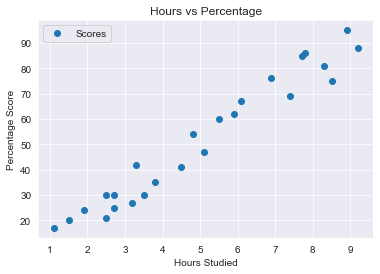

In [14]:
student_scores_df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### 1.4 Preprocess the Data & split to train set and test set

<span style="color:red">Task : split the data into tarin (80%) and test (20%)</span>

In [16]:
X = student_scores_df.iloc[:, :-1].values
y = student_scores_df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 1.5 Build, Train and Test ModelLinear Regression Model

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Model intercept : 2.018160041434683
Model coefficient : [9.91065648]


In [18]:
eval_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### 1.5 Evaluate model using appropiate evaluation metrics

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


## 2. Multiple Linear Regression

Linear regression involving multiple variables is called "multiple linear regression"
We will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.
We seek a model of the form:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n.$$

### 2.3  Load and Explore the dataset

In [20]:
petrol_consumption_df = pd.read_csv('petrol_consumption.csv')
petrol_consumption_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [21]:
petrol_consumption_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


### 2.4 Preprocess the Data & split to train set and test set

In [22]:
X = petrol_consumption_df.drop('Petrol_Consumption', axis=1)
y = petrol_consumption_df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### 2.5 Build, Train and Test Model Regression Model

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

Model intercept : 425.59933220324194
Model coefficients : [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


### 2.6 Evaluate model using appropiate evaluation metrics

<span style="color:red">Task 1 : Use the predict function in the model(`regressor`) to predict the output of the testset(`X_test`) and  print it. </span>

<span style="color:red">Task  2 : Measure the performance of the model using: <br>     </span>
1. root mean squared error 
1. mean absolute error 
1. coefficient of determination $R^2$. See [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for $R^2$.

In [24]:
y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
eval_df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score for predict:', metrics.r2_score(y_train, regressor.predict(X_train)))
print('R2 score for test:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 56.82224747896471
Mean Squared Error: 4666.344787588364
Root Mean Squared Error: 68.3106491521517
R2 score for predict: 0.72081542958177
R2 score for test: 0.2036193241012172


## 3. Polynomial Regression, Underfitting & Overfitting

Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders with interactive variables.

1. Why do we need it?
1. Which order of the polynomial should we choose? 
2. should we always pick the most complex model? 



### 3.2 Import libraries

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### 3.3 Load and Explore the dataset
<span style="color:red">Task : generate synthetic dataset by adding some random gaussian noise to a cosine function.</span>

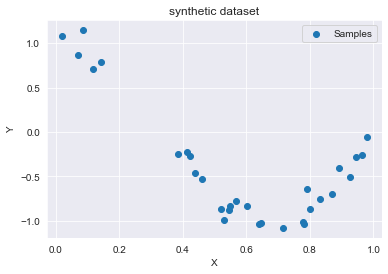

In [33]:
# sinusoidal function
def fn(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = fn(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X,y,label="Samples")
plt.title('synthetic dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best")
plt.show()

### 3.4 Preprocess the Data, build model and evaluate model 

* We will build three polynomial models with degrees [1, 4, 15] and observe the effect of increasing the degree of complixity of the model on how well it suits the data.
* We will evaluate our model using cross validation

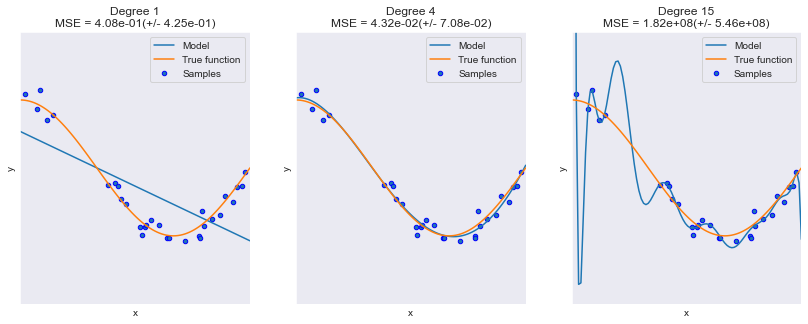

In [36]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))

def sinusoidal(X):
    return np.cos(1.5 * np.pi * X)

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, sinusoidal(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## <center>Self practice</center>

* Using boston house-prices dataset from sklearn ([sklearn.datasets.fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)).
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Train a multiple linear regression model that will predict the house price `(target)`.
    1. Print the model `Mean Absolute Error`, `Mean Squared Error` and `Root Mean Squared Error`


* Select one indipendent and select `target` as dependent variable 
    1. Visualise the data (using `matplotlib`)
    1. Create a Polynomial Regression model using `[1,5,24]` as degrees
    1. Explain your observations in terms of Over-fitting, Under-fitting, Bias-Variance trade-offs. 

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
eval_df

,Actual,Predicted
0,1.369,2.281107
1,2.413,2.790091
2,2.007,1.903328
3,0.725,1.017603
4,4.600,2.948524
...,...,...
4123,1.695,1.616753
4124,2.046,2.409188
4125,1.286,0.841870
4126,2.595,2.798495


In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score for predict:', metrics.r2_score(y_train, regressor.predict(X_train)))
print('R2 score for test:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.5351261336554739
Mean Squared Error: 0.5289841670367246
Root Mean Squared Error: 0.727312977360314
R2 score for predict: 0.6088968118672871
R2 score for test: 0.5943232652466175
